# 📓 05 - Automated Reports & Insights

In this notebook, we generate automated reports to summarize the performance of the forecasting model and highlight key business insights.  
This is a valuable component for decision-making and stakeholder communication.


In [1]:
# 📚 Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('/home/amanda/rossmann-sales-forecast/src/'), '..')))
from src.etl import carregar_dados, limpar_dados
from src.features import criar_variaveis_temporais, criar_lags, criar_medias_moveis
from src.predict import prever_proximos_dias


## 📂 Load and Prepare Data

We load the original datasets and prepare them for analysis.


In [2]:
# Load and prepare the data
df = carregar_dados("~/rossmann-sales-forecast/data/raw/train.csv", "~/rossmann-sales-forecast/data/raw/store.csv")
df = limpar_dados(df)


/home/amanda/rossmann-sales-forecast/src/etl.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(caminho_treino)


## 📈 Store Performance Overview

We generate summary statistics and identify the top and bottom performing stores based on average sales.


In [3]:
# Average sales per store
avg_sales = df.groupby('Store')['Sales'].mean().sort_values(ascending=False)

top_5 = avg_sales.head(5)
bottom_5 = avg_sales.tail(5)

print("🔝 Top 5 stores by average sales:")
display(top_5)

print("\n🔻 Bottom 5 stores by average sales:")
display(bottom_5)


🔝 Top 5 stores by average sales:


Store
817     21757.483418
262     20718.515924
1114    20666.562500
251     19123.068036
842     18574.795820
Name: Sales, dtype: float64


🔻 Bottom 5 stores by average sales:


Store
841    2972.608974
208    2936.290816
198    2900.604859
543    2790.380282
307    2703.736573
Name: Sales, dtype: float64

## 🔍 Sales and Promotions

We analyze how promotions affect sales using visualizations.


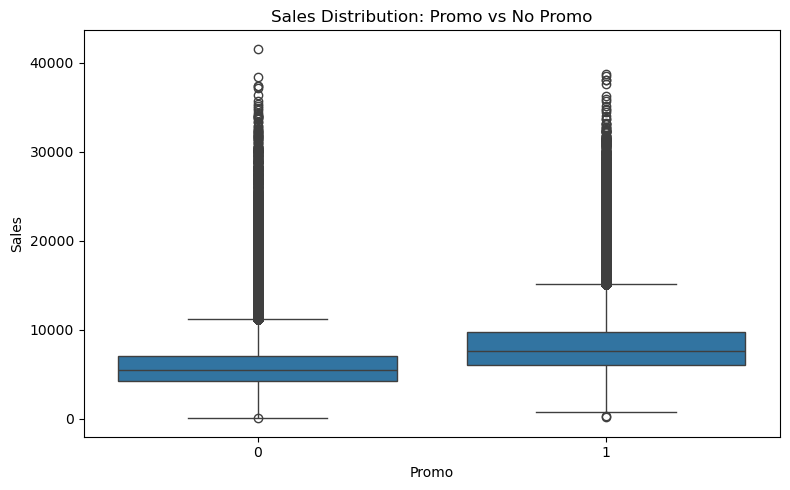

In [4]:
# Boxplot of sales with and without promotion
plt.figure(figsize=(8, 5))
sns.boxplot(x='Promo', y='Sales', data=df)
plt.title("Sales Distribution: Promo vs No Promo")
plt.xlabel("Promo")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


## 🔮 Predict and Summarize Future Sales

Let’s generate sales forecasts for the top 3 stores and summarize the expected revenue.


/tmp/ipykernel_11979/4212644641.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/amanda/miniforge3/envs/cvstars/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


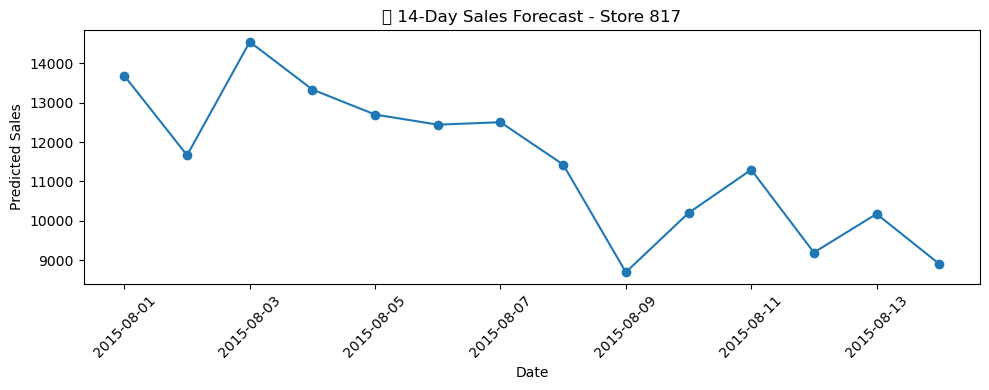

/tmp/ipykernel_11979/4212644641.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/amanda/miniforge3/envs/cvstars/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


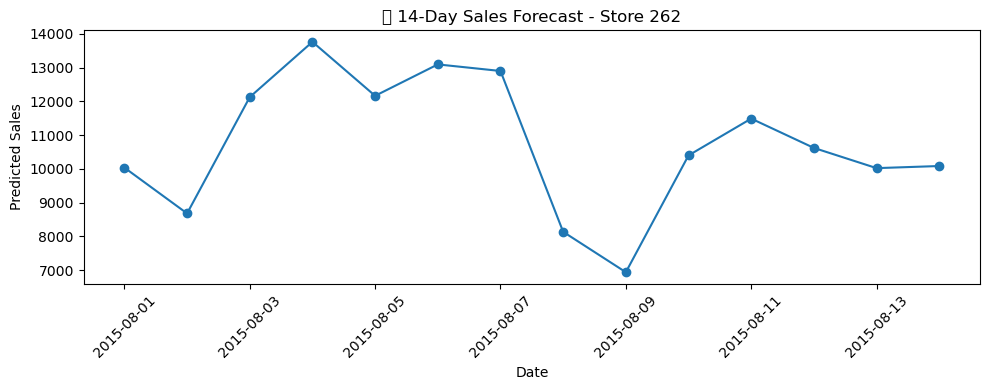

/tmp/ipykernel_11979/4212644641.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/amanda/miniforge3/envs/cvstars/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


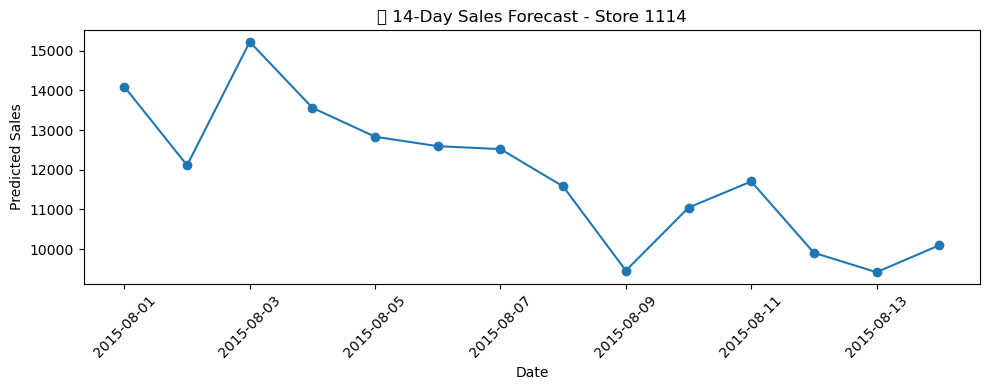

In [5]:
model = joblib.load("/home/amanda/rossmann-sales-forecast/models/xgb_model.pkl")

summary = []

for store_id in top_5.index[:3]:
    df_prev = prever_proximos_dias(df, model, store_id=store_id, n_dias=14)
    if not isinstance(df_prev, str):
        total = df_prev['Previsao_vendas'].sum()
        summary.append((store_id, total))
        # Plot forecast
        plt.figure(figsize=(10, 4))
        plt.plot(df_prev['Data_prevista'], df_prev['Previsao_vendas'], marker='o')
        plt.title(f"📊 14-Day Sales Forecast - Store {store_id}")
        plt.xlabel("Date")
        plt.ylabel("Predicted Sales")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


## 📋 Summary Table of Forecasted Sales

Total predicted sales for the top stores in the next 14 days.


In [6]:
df_summary = pd.DataFrame(summary, columns=['Store', 'Total Forecasted Sales'])
df_summary


,Store,Total Forecasted Sales
0,817,160766.093750
1,262,150463.984375
2,1114,166167.828125


## ✅ Conclusions

- **Promotions have a significant effect** on sales distribution, increasing variability and boosting performance.
- **Top performing stores** show consistently higher revenue and may be prioritized for strategic planning.
- This reporting notebook provides **quick, automated insights** to aid decision-making across different store profiles.
